## Ethereum Data Preparation


In [72]:
import numpy as np
import pandas as pd
import hvplot.pandas
from datetime import datetime, date
from functools import reduce

In [73]:
# Set the random seed for reproducibility
# Note: This is for the homework solution, but it is good practice to comment 
#this out and run multiple experiments to evaluate your model
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [85]:
# Load the fear and greed sentiment data for Bitcoin (only fear and greed index)
fng_df = pd.read_csv('fng.csv')
fng_df = fng_df.rename(columns={'date':'Date', 'value_classification':'FNG Class'})
fng_df = fng_df.drop(columns=['value'])
mapping = {'Extreme Fear':'-1.0', 'Fear':'-0.5', 'Neutral':'0.0', 
        'Greed':'0.5', 'Extreme Greed':'1.0'}
fng_df['FNG Class'] = fng_df['FNG Class'].map(mapping)
fng_df['FNG Class'] = pd.to_numeric(fng_df['FNG Class'])
fng_df['FNG Class'] = fng_df['FNG Class'].astype(int)
display(fng_df.dtypes)
fng_df.tail()

Date         object
FNG Class     int64
dtype: object

,Date,FNG Class
715,2019-02-01,-1
716,2019-01-31,-1
717,2019-01-30,-1
718,2019-01-29,-1
719,2019-01-28,0


In [86]:
fng_df.set_index(['Date'], inplace=True)
fng_df.tail()

,FNG Class
Date,
2019-02-01,-1
2019-01-31,-1
2019-01-30,-1
2019-01-29,-1
2019-01-28,0


In [99]:
# Load the vader sentiment data for Ethereum
eth_vader_df = pd.read_csv('eth_vader.csv', infer_datetime_format=True, parse_dates=True)
eth_vader_df["Publish Date"] = [date[0:10] for date in eth_vader_df["Publish Date"]]
eth_vader_df = eth_vader_df.drop(columns=["Post ID", "Title", "Url", "Author", "Score", "Total No. of Comments", "Permalink",
        "title_pos", "title_neu", "title_neg", "title_sent"], axis=1)
eth_vader_df.rename(columns = {'Publish Date':'Date', 'title_compound': 'Vader Compound'}, inplace = True)
# eth_vader_df['Publish Date']=(pd.to_datetime(eth_vader_df['Publish_Date'])) # ,***unit='s'***
#display(eth_vader_df.dtypes)
eth_vader_df.head()

,Date,Vader Compound
0,2019-01-24,0.2023
1,2019-02-05,0.0000
2,2019-02-06,-0.5859
3,2019-02-13,0.0000
4,2019-02-13,0.0000


In [6]:
eth_vader_df.set_index(['Date'], inplace=True)
eth_vader_df.head()

,Score,Vader Compound
Date,,
2019-01-24,1,0.2023
2019-02-05,1,0.0000
2019-02-06,1,-0.5859
2019-02-13,1,0.0000
2019-02-13,1,0.0000


In [130]:
# Load the historical closing prices for Ethereum
eth_close_df = pd.read_csv('ethprices.csv')
eth_close_df = eth_close_df.sort_index()
eth_close_df = eth_close_df.rename(columns={'date':'Date', 'close':'Close Price'})
eth_close_df = eth_close_df.drop(["symbol", "volume"], axis=1)
eth_close_df['Close Price'] = pd.to_numeric(eth_close_df['Close Price'])
eth_close_df['Close Price'] = eth_close_df['Close Price'].astype(int)
display(eth_close_df.dtypes)
eth_close_df.head()

Date           object
Close Price     int64
dtype: object

,Date,Close Price
0,2019-01-28,105
1,2019-01-29,104
2,2019-01-30,107
3,2019-01-31,105
4,2019-02-01,105


In [131]:
eth_close_df.set_index(['Date'], inplace=True)
eth_close_df.head()

,Close Price
Date,
2019-01-28,105
2019-01-29,104
2019-01-30,107
2019-01-31,105
2019-02-01,105


In [92]:
# Load the exponential weighted moving average data for Ethereum
eth_ewm_df = pd.read_csv('eth_ema.csv')
eth_ewm_df = eth_ewm_df.sort_index()
#eth_ewm_df.set_index(['Date'], inplace=True)
eth_ewm_df = eth_ewm_df.rename(columns={'date':'Date', 'crossover_signal':'EWM Cross Signal'})
eth_ewm_df = eth_ewm_df.drop(["symbol", "close", "volume", "daily_return", "fast_close", "slow_close", "crossover_long", "crossover_short"], axis=1)
eth_ewm_df['EWM Cross Signal'] = pd.to_numeric(eth_ewm_df['EWM Cross Signal'])
eth_ewm_df['EWM Cross Signal'] = eth_ewm_df['EWM Cross Signal'].astype(int)
eth_ewm_df.head()

,Date,EWM Cross Signal
0,2019-01-28,0
1,2019-01-29,-1
2,2019-01-30,1
3,2019-01-31,1
4,2019-02-01,1


In [93]:
eth_ewm_df.set_index(['Date'], inplace=True)
eth_ewm_df.head()

,EWM Cross Signal
Date,
2019-01-28,0
2019-01-29,-1
2019-01-30,1
2019-01-31,1
2019-02-01,1


In [94]:
# Load the money flow index for Ethereum
eth_mfi_df = pd.read_csv('mfi_eth.csv')
eth_mfi_df = eth_mfi_df.sort_index()
eth_mfi_df = eth_mfi_df.rename(columns={'date':'Date'})
eth_mfi_df = eth_mfi_df.drop(["symbol", "close", "volume", "Buy", "Sell"], axis=1)
eth_mfi_df['MFI'] = pd.to_numeric(eth_mfi_df['MFI'])
eth_mfi_df['MFI'] = eth_mfi_df['MFI'].astype(int)
eth_mfi_df.head()

,Date,MFI
0,2019-02-11,39
1,2019-02-12,49
2,2019-02-13,43
3,2019-02-14,45
4,2019-02-15,53


In [95]:
eth_mfi_df.set_index(['Date'], inplace=True)
eth_mfi_df.head()

,MFI
Date,
2019-02-11,39
2019-02-12,49
2019-02-13,43
2019-02-14,45
2019-02-15,53


In [96]:
# Load the money flow index for Ethereum
eth_google_df = pd.read_csv('eth_google.csv')
eth_google_df = eth_google_df.sort_index()
display(eth_google_df.dtypes)
eth_google_df.head()

Date                   object
Google Search Count     int64
dtype: object

,Date,Google Search Count
0,2019-01-28,5
1,2019-01-29,5
2,2019-01-30,5
3,2019-01-31,5
4,2019-02-01,5


In [97]:
eth_google_df.set_index(['Date'], inplace=True)
eth_google_df.head()

,Google Search Count
Date,
2019-01-28,5
2019-01-29,5
2019-01-30,5
2019-01-31,5
2019-02-01,5


In [100]:
# MERGE the closing price, ewm, fng, mfi, and Google DataFrames into a single DataFrame

eth_dfs = [eth_close_df, eth_ewm_df, fng_df, eth_mfi_df, eth_google_df]
eth_data_df = reduce(lambda left, right: pd.merge(left, right, on='Date'), eth_dfs)
eth_df = eth_data_df.merge(eth_vader_df, on = 'Date', how = 'left')
eth_df.head()

,Date,Close Price,EWM Cross Signal,FNG Class,MFI,Google Search Count,Vader Compound
0,2019-02-11,119,1,0,39,7,NaN
1,2019-02-12,121,1,0,49,7,NaN
2,2019-02-13,120,1,0,43,7,0.0
3,2019-02-13,120,1,0,43,7,0.0
4,2019-02-14,119,1,0,45,7,NaN


In [103]:
# Load the gas price data for Ethereum
eth_gas_df = pd.read_csv('eth_gas_price.csv')
eth_gas_df = eth_gas_df.sort_index()
eth_gas_df["f0_"] = [date[0:10] for date in eth_gas_df["f0_"]]
eth_gas_df = eth_gas_df.rename(columns={'f0_':'Date'})
eth_gas_df['f1_'] = pd.to_numeric(eth_gas_df['f1_'])
eth_gas_df['f1_'] = eth_gas_df['f1_'].astype(int)
display(eth_gas_df.dtypes)
eth_gas_df.head()

Date    object
f1_      int64
dtype: object

,Date,f1_
0,2020-05-31,24120453161872812
1,2019-11-04,10097144184654284
2,2019-07-19,14119991820092804
3,2019-09-02,12061924067554728
4,2019-05-24,13599066701652526


In [104]:
eth_gas_df.set_index(['Date'], inplace=True)
eth_gas_df.head()

,f1_
Date,
2020-05-31,24120453161872812
2019-11-04,10097144184654284
2019-07-19,14119991820092804
2019-09-02,12061924067554728
2019-05-24,13599066701652526


In [114]:
# Load the mining difficulty data for Ethereum
eth_diff_df = pd.read_csv('mining_diff.csv')
eth_diff_df = eth_diff_df.sort_index()
eth_diff_df["f0_"] = [date[0:10] for date in eth_diff_df["f0_"]]
eth_diff_df = eth_diff_df.rename(columns={'f0_':'Date'})
eth_diff_df = eth_diff_df.sort_index()
#eth_diff_df['f1_'] = pd.to_numeric(eth_diff_df['f1_'])
#eth_diff_df['f1_'] = eth_diff_df['f1_'].astype(int)
display(eth_diff_df.dtypes)
eth_diff_df.head()

Date    object
f1_     object
dtype: object

,Date,f1_
0,2019-02-08,11675962921748186482
1,2020-12-07,23435690773987300016
2,2019-01-11,14983853717188636564
3,2020-01-30,13276090712106226622
4,2019-05-15,13118305205057608143


In [115]:
eth_diff_df.set_index(['Date'], inplace=True)
eth_diff_df.head()

,f1_
Date,
2019-02-08,11675962921748186482
2020-12-07,23435690773987300016
2019-01-11,14983853717188636564
2020-01-30,13276090712106226622
2019-05-15,13118305205057608143


In [122]:
# Load the actual ethereum value (transfers) data for Ethereum (volume of transactions by day)
eth_value_df = pd.read_csv('actual_eth_value.csv') #, index_col="date", infer_datetime_format=True, parse_dates=True)
eth_value_df = eth_value_df.sort_index()
eth_value_df["f0_"] = [date[0:10] for date in eth_value_df["f0_"]]
eth_value_df = eth_value_df.rename(columns={'f0_':'Date'})
#eth_value_df['f1_'] = pd.to_numeric(eth_value_df['f1_'])
#eth_value_df['f1_'] = eth_value_df['f1_'].astype(int)
display(eth_value_df.dtypes)
eth_value_df.head()

Date    object
f1_     object
dtype: object

,Date,f1_
0,2019-04-24,3490000000000000000000000
1,2019-04-03,4170000000000000000000000
2,2020-08-12,4200000000000000000000000
3,2020-09-01,6880000000000000000000000
4,2021-01-17,144000000000000000000000


In [121]:
eth_value_df.set_index(['Date'], inplace=True)
eth_value_df.head()

,f1_
Date,
2019-04-24,3490000000000000000000000
2019-04-03,4170000000000000000000000
2020-08-12,4200000000000000000000000
2020-09-01,6880000000000000000000000
2021-01-17,144000000000000000000000


In [132]:
# MERGE the mining data into a single DataFrame
dfs = [eth_diff_df, eth_gas_df, eth_value_df]
eth_mining_df = reduce(lambda left, right: pd.merge(left, right, on='Date'), dfs)
eth_string_time = "2019-02-08"
eth_datetime = datetime.strptime(eth_string_time, "%Y-%m-%d")
eth_mining_df.rename(columns = {'f0_':'Date', 'f1__x':'Mining Difficulty', 'f1__y': 'Gas Price', 'f1_':'Actual Value' }, inplace = True)
display(eth_mining_df.dtypes)
eth_mining_df.head()

Date                 object
Mining Difficulty    object
Gas Price             int64
Actual Value         object
dtype: object

,Date,Mining Difficulty,Gas Price,Actual Value
0,2019-02-08,11675962921748186482,6269616916635104,2150000000000000000000000
1,2020-12-07,23435690773987300016,55219775987839640,2750000000000000000000000
2,2019-01-11,14983853717188636564,7381782274341527,3890000000000000000000000
3,2020-01-30,13276090712106226622,5117951080589144,1360000000000000000000000
4,2019-05-15,13118305205057608143,13779214112810910,4390000000000000000000000


In [124]:
eth_master_df = eth_df.merge(eth_mining_df, on = 'Date', how = 'left')
eth_master_df.head()

,Date,Close Price,EWM Cross Signal,FNG Class,MFI,Google Search Count,Vader Compound,Mining Difficulty,Gas Price,Actual Value
0,2019-02-11,119,1,0,39,7,NaN,11705954410276590164,5982039373342631,1910000000000000000000000
1,2019-02-12,121,1,0,49,7,NaN,12158807251676191897,5694758831679106,1540000000000000000000000
2,2019-02-13,120,1,0,43,7,0.0,11730244995019888264,6722683423079632,1810000000000000000000000
3,2019-02-13,120,1,0,43,7,0.0,11730244995019888264,6722683423079632,1810000000000000000000000
4,2019-02-14,119,1,0,45,7,NaN,11514347753303334807,9071692518536958,1670000000000000000000000


## Training and Testing for Closing Prices

In [133]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(eth_master_df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(eth_master_df) - window - 1):
        features = eth_master_df.iloc[i:(i + window), feature_col_number]
        target = eth_master_df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [139]:
# Predict Closing Prices using a 10 day window of previous closing prices
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 10

# Column index 0 is the 'Date' column
# Column index 1 is the `Close Price` column
feature_column = 1
target_column = 1
X, y = window_data(eth_master_df, window_size, feature_column, target_column)

In [140]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test_scaler = y[split:]

In [141]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test_scaler = scaler.transform(y_test_scaler)


In [142]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

---

## Build and Train the LSTM RNN for Historical Closing Prices

In this section, you will design a custom LSTM RNN and fit (train) it using the training data.

You will need to:
1. Define the model architecture
2. Compile the model
3. Fit the model to the training data

### Hints:
You will want to use the same model architecture and random seed for both notebooks. This is necessary to accurately compare the performance of the FNG model vs the closing price model. 

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [144]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,             #carries the values forward
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))


In [145]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [146]:
# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10, 30)            3840      
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 30)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 30)            7320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 30)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [147]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=100, verbose=1)

Epoch 1/10
6/6 [==============================] - 4s 16ms/step - loss: 0.0045
Epoch 2/10
6/6 [==============================] - 0s 14ms/step - loss: 0.0018
Epoch 3/10
6/6 [==============================] - 0s 12ms/step - loss: 0.0021
Epoch 4/10
6/6 [==============================] - 0s 12ms/step - loss: 0.0014
Epoch 5/10
6/6 [==============================] - 0s 12ms/step - loss: 0.0012
Epoch 6/10
6/6 [==============================] - 0s 12ms/step - loss: 0.0012
Epoch 7/10
6/6 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 8/10
6/6 [==============================] - 0s 12ms/step - loss: 8.2557e-04
Epoch 9/10
6/6 [==============================] - 0s 11ms/step - loss: 5.8793e-04
Epoch 10/10
6/6 [==============================] - 0s 11ms/step - loss: 5.5777e-04


---

## Model Performance

In this section, you will evaluate the model using the test data. 

You will need to:
1. Evaluate the model using the `X_test` and `y_test` data.
2. Use the X_test data to make predictions
3. Create a DataFrame of Real (y_test) vs predicted values. 
4. Plot the Real vs predicted values as a line chart

### Hints
Remember to apply the `inverse_transform` function to the predicted and y_test values to recover the actual closing prices.

In [148]:
# Evaluate the model
model.evaluate(X_test, y_test_scaler)

9/9 [==============================] - 1s 3ms/step - loss: 0.0059


0.005890383385121822

In [149]:
# Make some predictions
predicted = model.predict(X_test)

In [150]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test_scaler.reshape(-1, 1))

In [151]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = eth_df.index[-len(real_prices): ]) 
stocks.head()

,Real,Predicted
608,372.0,335.266754
609,372.0,344.122284
610,372.0,353.531128
611,372.0,360.450684
612,372.0,365.868896


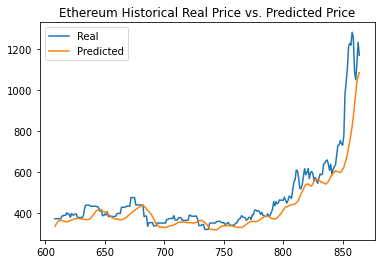

In [152]:
# Plot the real vs predicted values as a line chart
stocks.plot.line(legend=True, title="Ethereum Historical Real Price vs. Predicted Price")

## Train and Test for Support Vector Regression with Multiple Features

In [153]:
eth_master_df = eth_df.merge(eth_mining_df, on = 'Date', how = 'left')
eth_master_df.head()

,Date,Close Price,EWM Cross Signal,FNG Class,MFI,Google Search Count,Vader Compound,Mining Difficulty,Gas Price,Actual Value
0,2019-02-11,119,1,0,39,7,NaN,11705954410276590164,5982039373342631,1910000000000000000000000
1,2019-02-12,121,1,0,49,7,NaN,12158807251676191897,5694758831679106,1540000000000000000000000
2,2019-02-13,120,1,0,43,7,0.0,11730244995019888264,6722683423079632,1810000000000000000000000
3,2019-02-13,120,1,0,43,7,0.0,11730244995019888264,6722683423079632,1810000000000000000000000
4,2019-02-14,119,1,0,45,7,NaN,11514347753303334807,9071692518536958,1670000000000000000000000


In [154]:
from sklearn.linear_model import LinearRegression # for building a linear regression model
from sklearn.svm import SVR # for building support vector regression model
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization

In [155]:
# ONE FEATURE + TARGET 
# Create a scatter plot
fig = px.scatter(eth_master_df, x=eth_master_df['Gas Price'], y=eth_master_df['Close Price'], 
                 opacity=0.8, color_discrete_sequence=['black'])

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Ethereum Closing Price Based on Gas Price", 
                             font=dict(color='black')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()
#view raw

In [156]:
# Fit the Linear Regression and SVR Models
# ------- Select variables -------
# Note, we need X to be a 2D array, hence reshape
X=eth_master_df['Gas Price'].values.reshape(-1,1)
y=eth_master_df['Close Price'].values

# ------- Linear regression -------
model1 = LinearRegression()
lr = model1.fit(X, y)

# ------- Support Vector regression -------
model2 = SVR(kernel='rbf', C=100, epsilon=100) # set kernel and hyperparameters
svr = model2.fit(X, y)

# ------- Predict a range of values based on the models for visualization -------
# Create 100 evenly spaced points from smallest X to largest X
x_range = np.linspace(X.min(), X.max(), 100)

# Predict y values for our set of X values
y_lr = model1.predict(x_range.reshape(-1, 1)) # Linear regression
y_svr = model2.predict(x_range.reshape(-1, 1)) # SVR

In [157]:
# Create a scatter plot
fig = px.scatter(eth_master_df, x=eth_master_df['Mining Difficulty'], y=eth_master_df['Close Price'], 
                 opacity=0.8, color_discrete_sequence=['black'])

# Add a best-fit line
fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='limegreen')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr+100, name='+epsilon', line=dict(color='red', dash='dot')))
fig.add_traces(go.Scatter(x=x_range, y=y_svr-100, name='-epsilon', line=dict(color='red', dash='dot')))

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title=dict(text="Close Price based on Gas Price with Model Predictions (epsilon(tube)=100, C(slack)=100)", 
                             font=dict(color='black')))
# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [158]:
# TWO FEATURES + TARGET
# Create a 3D scatter plot
fig = px.scatter_3d(eth_master_df, x=eth_master_df['Gas Price'], y=eth_master_df['Close Price'], z=eth_master_df['Actual Value'], 
                 opacity=0.8, color_discrete_sequence=['black'])

# Set figure title
fig.update_layout(title_text="Scatter 3D Plot",
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black', 
                                          gridcolor='lightgrey')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

In [70]:
# ----------- Model fitting -----------
# Define models and set hyperparameter values
model1 = LinearRegression()
model2 = SVR(kernel='rbf', C=100, epsilon=1)

# Fit the two models 
lr = model1.fit(X, y)
svr = model2.fit(X, y)

# ----------- For creating a prediciton plane to be used in the visualization -----------
# Set Increments between points in a meshgrid
mesh_size = 1

# Identify min and max values for input variables
x_min, x_max = X['Mining Difficulty'].min(), X['Mining Difficulty'].max()
y_min, y_max = X['Close Price'].min(), X['Close Price'].max()

# Return evenly spaced values based on a range between min and max
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)

# Create a meshgrid
xx, yy = np.meshgrid(xrange, yrange)

# ----------- Create a prediciton plane  -----------
# Use models to create a prediciton plane --- Linear Regression
pred_LR = model1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_LR = pred_LR.reshape(xx.shape)

# Use models to create a prediciton plane --- SVR
pred_svr = model2.predict(np.c_[xx.ravel(), yy.ravel()])
pred_svr = pred_svr.reshape(xx.shape)

# Note, .ravel() flattens the array to a 1D array,
# then np.c_ takes elements from flattened xx and yy arrays and puts them together,
# this creates the right shape required for model input

# prediction array that is created by the model output is a 1D array,
# Hence, we need to reshape it to be the same shape as xx or yy to be able to display it on a graph

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [41]:
from sklearn import model_selection
from sklearn import svm# Create a 3D scatter plot
fig = px.scatter_3d(df, x=df['X3 distance to the nearest MRT station'], y=df['X2 house age'], z=df['Y house price of unit area'], 
                 opacity=0.8, color_discrete_sequence=['black'])

# Set figure title
fig.update_layout(title_text="Scatter 3D Plot",
                  scene = dict(xaxis=dict(backgroundcolor='w# Create a 3D scatter plot
fig = px.scatter_3d(df, x=df['X3 distance to the nearest MRT station'], y=df['X2 house age'], z=df['Y house price of unit area'], 
                 opacity=0.8, color_discrete_sequence=['black'])

# Set figure title
fig.update_layout(title_text="Scatter 3D Plot",
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black', 
                                          gridcolor='lightgrey')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()hite',
                                          color='black',
                                          gridcolor='lightgrey'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='lightgrey'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black', 
                                          gridcolor='lightgrey')))

# Update marker size
fig.update_traces(marker=dict(size=3))

fig.show()

eth_features = ['EWM Cross Signal', 'FNG Class', 'Google Search Count']

# Extract features
X = eth_master_df.loc[:, eth_features].values

# Extract target 'Close Price'
Y = eth_master_df.loc[:, ['Close Price']].values

# keeping 30% reserved for testing purpose and 70% data will be used to train and form model.
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X, Y, test_size=0.3, random_state=0)

# Build a Support Vector Classification model using linear regression
eth_svm = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)

/Users/cathyslider/opt/anaconda3/envs/dev/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ValueError: Unknown label type: 'continuous'

In [ ]:
# Validate robustness of above model using K-Fold Cross validation technique

# We give cross_val_score a model, the entire iris data set and its real values, and the number of folds:

scores_res = model_selection.cross_val_score(clf_ob, X, Y, cv=5)

# Print the accuracy of each fold (i.e. 5 as above we asked cv 5)
print(scores_res)

# And the mean accuracy of all 5 folds.
print(scores_res.mean())

In [254]:
# Summarize the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 10, 30)            3840      
_________________________________________________________________
dropout_15 (Dropout)         (None, 10, 30)            0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 10, 30)            7320      
_________________________________________________________________
dropout_16 (Dropout)         (None, 10, 30)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dropout_17 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [250]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [256]:
# Evaluate the model
model.evaluate(X_test, y_test_scaler)

9/9 [==============================] - 1s 3ms/step - loss: 0.0056


0.005641849245876074

In [257]:
# Make some predictions
predicted = model.predict(X_test)

In [258]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test_scaler.reshape(-1, 1))

In [259]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = eth_df.index[-len(real_prices): ]) 
stocks.head()

,Real,Predicted
Date,,
2020-08-02,372.17,342.534668
2020-08-02,372.17,351.651978
2020-08-02,372.17,361.238159
2020-08-02,372.17,368.216187
2020-08-02,372.17,373.671448


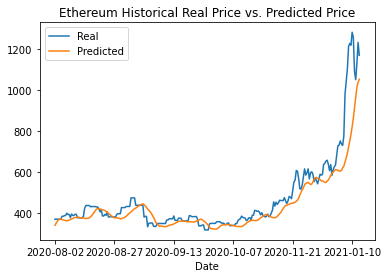

In [260]:
# Plot the real vs predicted values as a line chart
stocks.plot.line(legend=True, title="Ethereum Historical Real Price vs. Predicted Price")